In [28]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [1]:
from sklearn.datasets import load_wine
data = load_wine()

In [10]:
X = data['data']
y = data['target']

In [19]:
import matplotlib.pyplot as plt

def draw_hists(X):
    for i in range(X.shape[1]):
        plt.hist(X[:, i])
        plt.show()

In [24]:
from copy import deepcopy
from scipy.stats import boxcox

class Normalize:
    def __init__(self):
        self.lambdas = []
    
    def fit(self, X):
        for i in range(X.shape[1]):
            _, lmbda = boxcox(X[:, i])
            self.lambdas.append(lmbda)
            
    def transform(self, X):
        X = deepcopy(X)
    
        for i in range(X.shape[1]):
            X[:, i] = boxcox(X[:, i], lmbda=self.lambdas[i])
    
        return X

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

normalazer = Normalize()
normalazer.fit(X_train)
X_train_norm = normalazer.transform(X_train)
X_test_norm = normalazer.transform(X_test)

standardizer = StandardScaler()
standardizer.fit(X_train)
X_train_stand = standardizer.transform(X_train)
X_test_stand = standardizer.transform(X_test)

In [37]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

original_model = XGBClassifier(verbosity=0, _label_encoder=False).fit(X_train, y_train)
norm_model = XGBClassifier(verbosity=0, _label_encoder=False).fit(X_train_norm, y_train)
stand_model = XGBClassifier(verbosity=0, _label_encoder=False).fit(X_train_stand, y_train)

/usr/local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [36]:
print(f'with original features: {accuracy_score(y_test, original_model.predict(X_test))}')
print(f'with normalazed features: {accuracy_score(y_test, norm_model.predict(X_test_norm))}')
print(f'with standardized features: {accuracy_score(y_test, stand_model.predict(X_test_stand))}')

with original features: 0.9722222222222222
with normalazed features: 0.9722222222222222
with standardized features: 0.9722222222222222


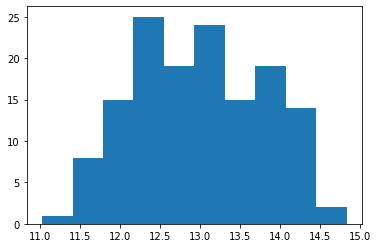

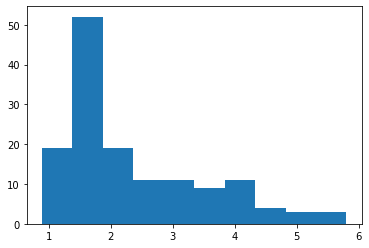

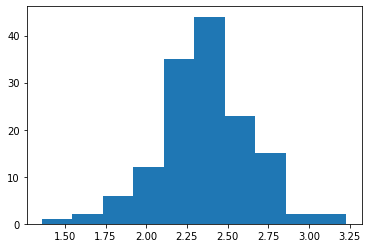

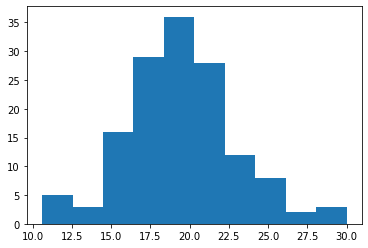

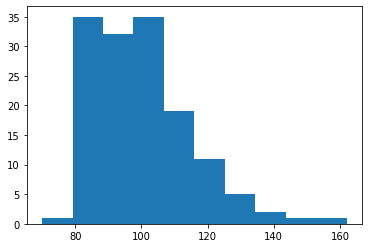

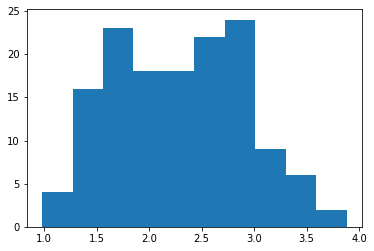

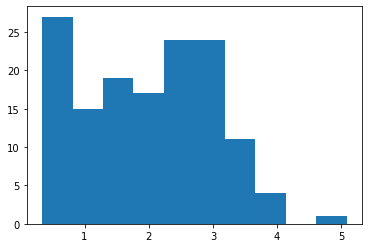

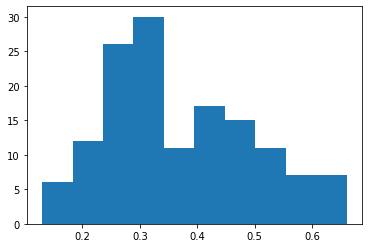

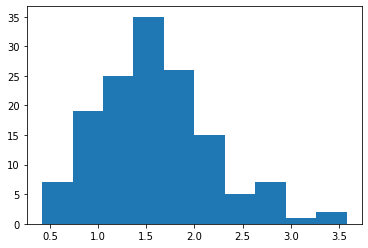

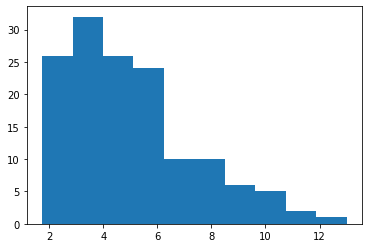

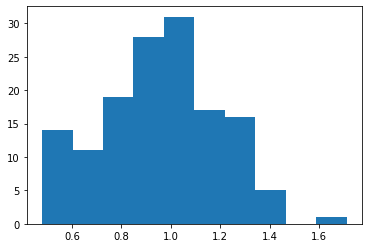

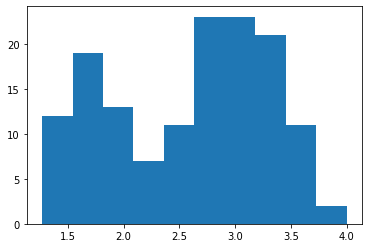

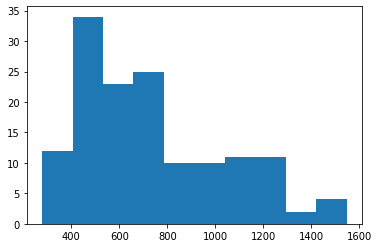

In [38]:
draw_hists(X_train)

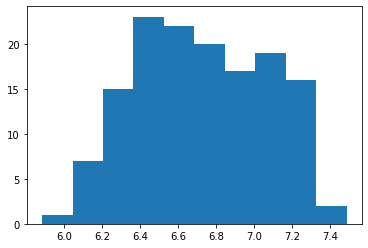

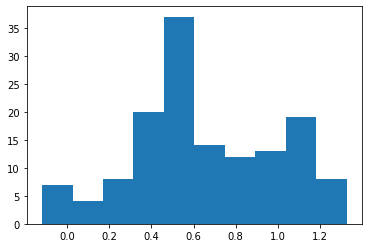

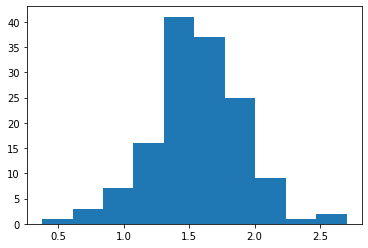

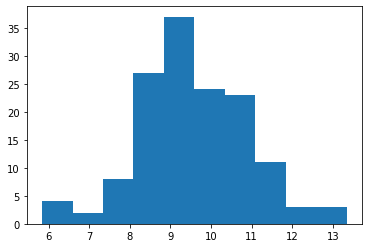

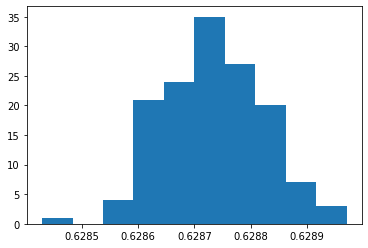

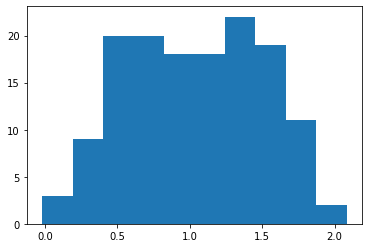

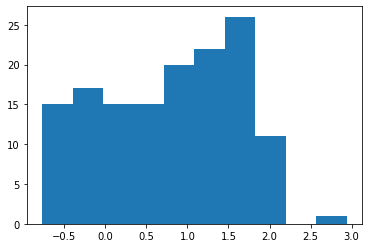

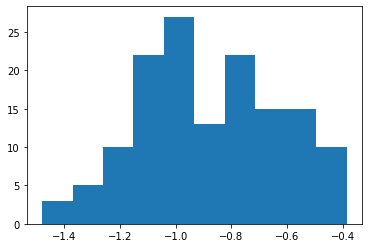

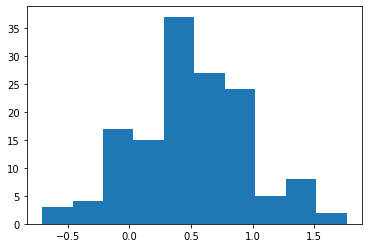

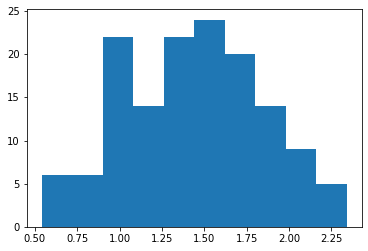

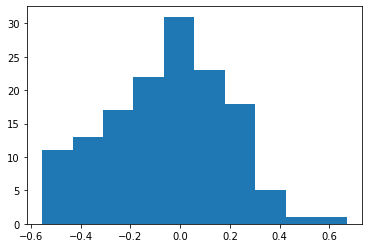

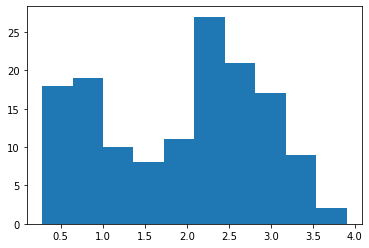

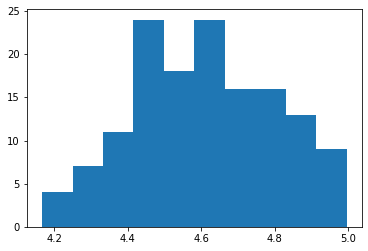

In [39]:
draw_hists(X_train_norm)

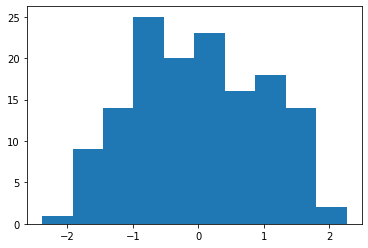

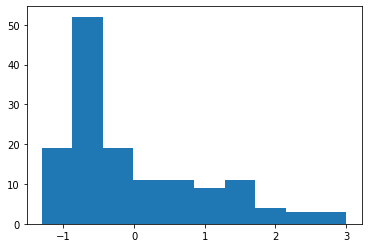

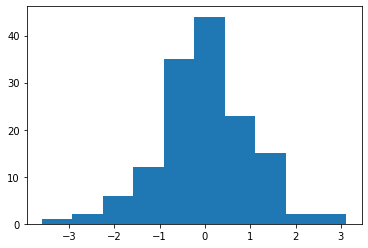

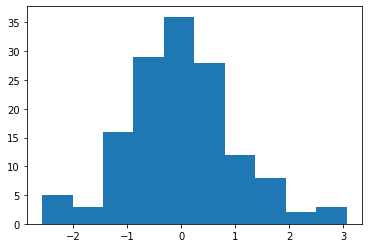

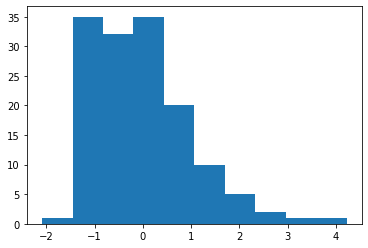

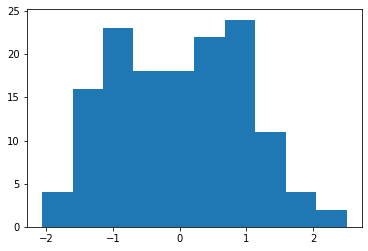

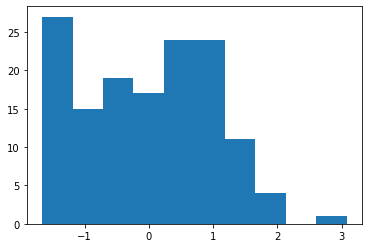

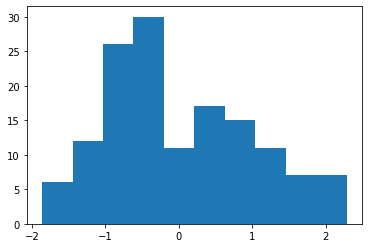

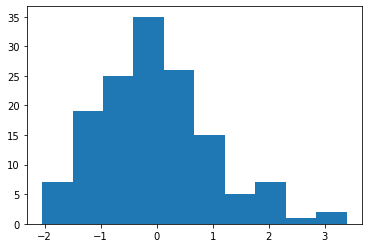

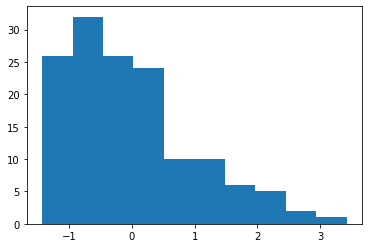

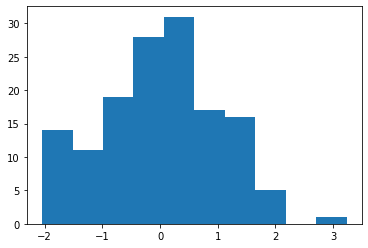

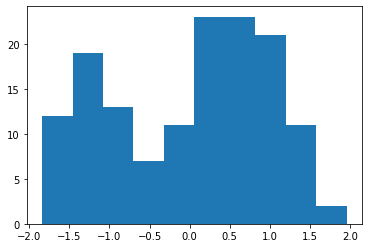

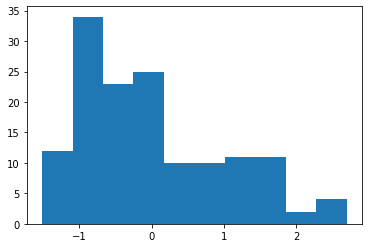

In [40]:
draw_hists(X_train_stand)